# Simple Linear Regression Cars CO2 Emission

we use scikit-learn to implement simple linear regression .

Data set us from IBM object storage .

We are working on CO2 Emission based on car features. 

## Importing needed packages 

In [3]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
import pylab as pl 
%matplotlib inline

## Download Dataset

we use wget to download the dataset . 

In [3]:
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

--2022-02-21 19:43:20--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  64.2KB/s    in 1.1s    

2022-02-21 19:43:25 (64.2 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



## Understanding data

### The dataset csv has these features.
    
*   **MODELYEAR** e.g. 2014
*   **MAKE** e.g. Acura
*   **MODEL** e.g. ILX
*   **VEHICLE CLASS** e.g. SUV
*   **ENGINE SIZE** e.g. 4.7
*   **CYLINDERS** e.g 6
*   **TRANSMISSION** e.g. A6
*   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
*   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
*   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
*   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0

## Reading Data 

In [4]:
df = pd.read_csv("FuelConsumption.csv")
df.head(15)
 


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [6]:
#summarize the data 
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [7]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS']]
cdf.head(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244
5,3.5,6,11.9,7.7,10.0,28,230
6,3.5,6,11.8,8.1,10.1,28,232
7,3.7,6,12.8,9.0,11.1,25,255
8,3.7,6,13.4,9.5,11.6,24,267
9,2.4,4,10.6,7.5,9.2,31,212


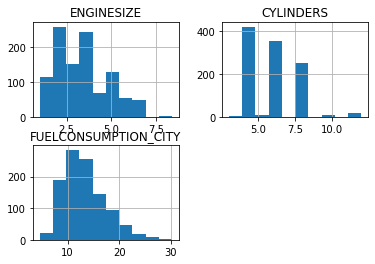

In [9]:
viz = cdf[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY']]
viz.hist()
plt.show()

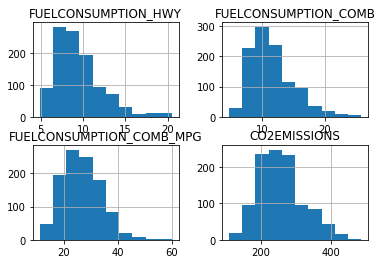

In [11]:
viz = cdf[['FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS']]
viz.hist()
plt.show()

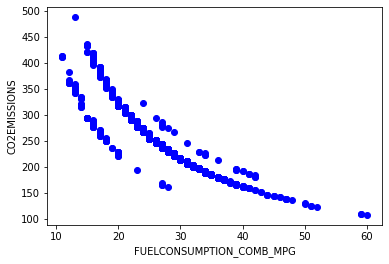

In [14]:
plt.scatter(cdf.FUELCONSUMPTION_COMB_MPG , cdf.CO2EMISSIONS , color = 'blue' )
plt.xlabel("FUELCONSUMPTION_COMB_MPG")
plt.ylabel('CO2EMISSIONS')
plt.show()

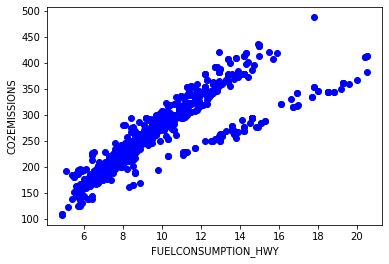

In [15]:
plt.scatter(cdf.FUELCONSUMPTION_HWY , cdf.CO2EMISSIONS , color = 'blue' )
plt.xlabel("FUELCONSUMPTION_HWY")
plt.ylabel('CO2EMISSIONS')
plt.show()

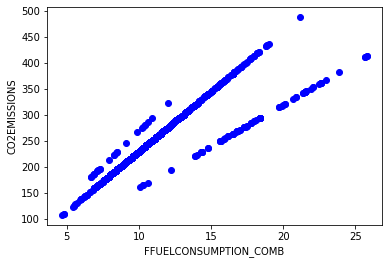

In [16]:
plt.scatter(cdf.FUELCONSUMPTION_COMB , cdf.CO2EMISSIONS , color = 'blue' )
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel('CO2EMISSIONS')
plt.show()

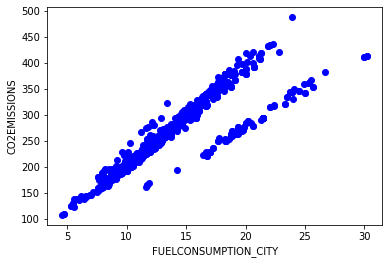

In [17]:
plt.scatter(cdf.FUELCONSUMPTION_CITY , cdf.CO2EMISSIONS , color = 'blue' )
plt.xlabel("FUELCONSUMPTION_CITY")
plt.ylabel('CO2EMISSIONS')
plt.show()

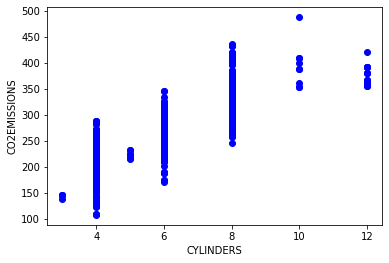

In [18]:
plt.scatter(cdf.CYLINDERS , cdf.CO2EMISSIONS , color = 'blue' )
plt.xlabel("CYLINDERS")
plt.ylabel('CO2EMISSIONS')
plt.show()

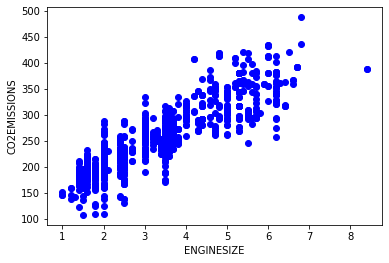

In [23]:
plt.scatter(cdf.ENGINESIZE , cdf.CO2EMISSIONS , color = 'blue' )
plt.xlabel("ENGINESIZE")
plt.ylabel('CO2EMISSIONS')
plt.show()

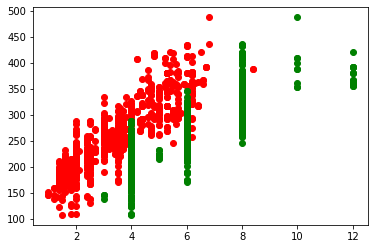

In [41]:
plt.scatter(x= cdf.ENGINESIZE  , y=cdf.CO2EMISSIONS , color='red', label="ENGINESIZE vs CO2E")
plt.scatter(x= cdf.CYLINDERS  , y=cdf.CO2EMISSIONS , color='green' , label="CYLINDERS vs CO2E")
plt.show()

## Creating Test and Train Dataset 

Let's split our dataset into train and test sets. 80% of the entire dataset will be used for training and 20% for testing. We create a mask to select random rows using np.random.rand() function:

In [50]:
mask = np.random.rand(len(df)) < 0.8
train = cdf[mask]
test = cdf[~mask]

## Simple linear Regression Model

we trsin our model based on Engine size , So the train dataset is :

### Train data distribution

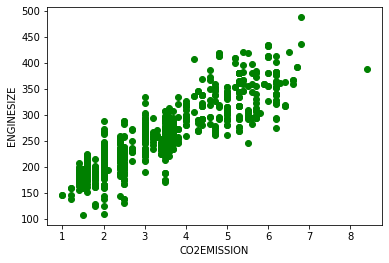

In [52]:
plt.scatter(train.ENGINESIZE , train.CO2EMISSIONS , color='green')
plt.xlabel("CO2EMISSION")
plt.ylabel("ENGINESIZE")
plt.show()

### Modeling 

using sklearn to train our linear regression model :


In [55]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[39.58855065]]
Intercept:  [124.21130453]


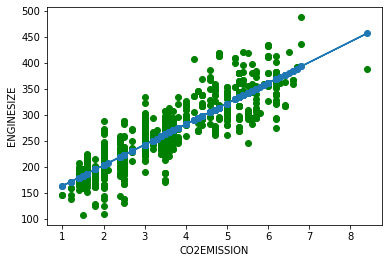

In [58]:
plt.scatter(train.ENGINESIZE , train.CO2EMISSIONS , color='green')
plt.plot(train.ENGINESIZE , regr.coef_[0][0]*train_x + regr.intercept_[0] , '-o')
plt.xlabel("CO2EMISSION")
plt.ylabel("ENGINESIZE")
plt.show()

## Evaluation 

We compare the actual values and predicted the accuracy of a regression model . 

Mean Absolute Error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.

Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean Absolute Error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.

Root Mean Squared Error (RMSE).

R-squared is not an error, but rather a popular metric to measure the performance of your regression model. It represents how close the data points are to the fitted regression line. The higher the R-squared value, the better the model fits your data. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

In [60]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 23.14
Residual sum of squares (MSE): 911.14
R2-score: 0.73
